In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fuzzy_elevator.fuzzy.model import FuzzyModel
from fuzzy_elevator.fuzzy.rules import RULES
from fuzzy_elevator.elevator import ElevatorManager
from fuzzy_elevator.objects import Config, Request
%load_ext autoreload
%autoreload 2

In [2]:
model = FuzzyModel(rules=RULES)

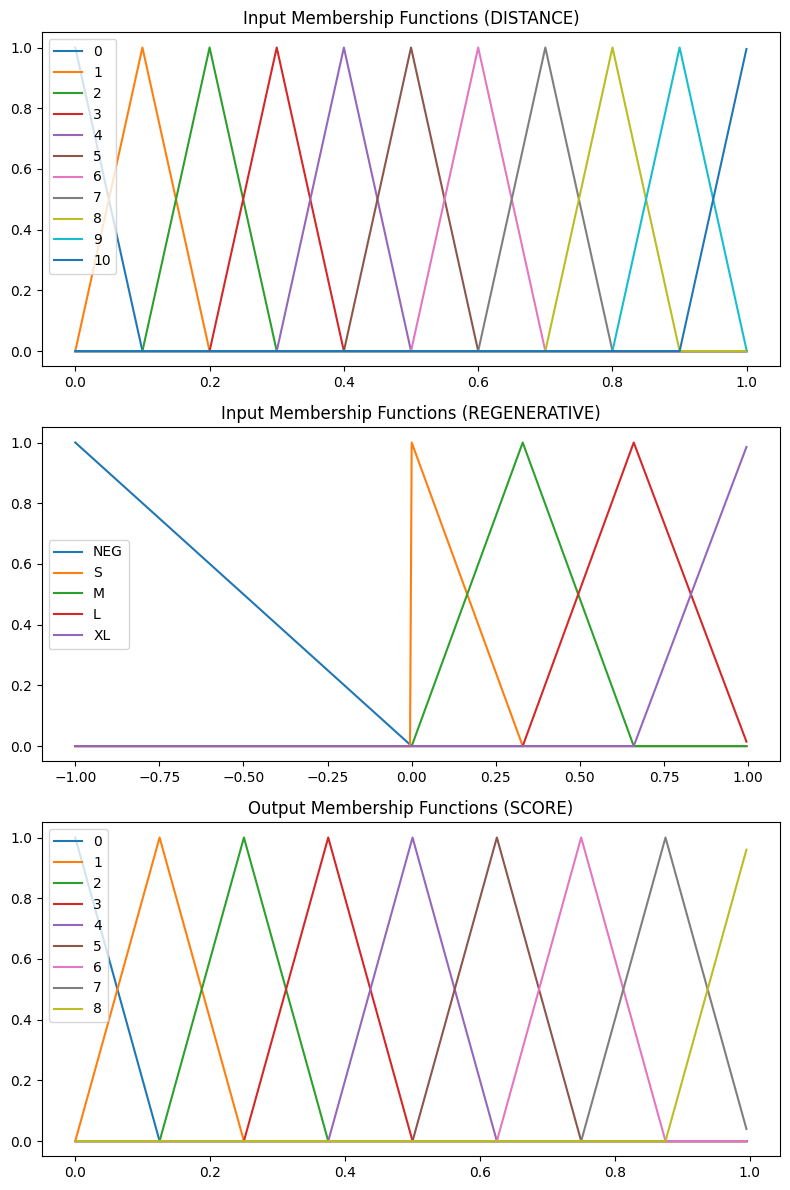

In [3]:
model.visualize_membership_functions()

In [6]:
config = Config(n_floors=10, n_elevators=1, elevator_weight=1000, counterweight=1210, max_load=420, average_unitary_load=70, rules=RULES)
manager = ElevatorManager.from_config(config)

In [7]:
manager.get_state()

{'elevator 0': 'current_floor: 0, target_floor: 0, load: 0.0, score: 0.0'}

In [39]:
manager.elevators[0].load=350
manager.elevators[0].current_floor=10
manager.elevators[0].target_floor=0

request = Request(floor=5, target_floor=0, load=70)

manager.send_elevator(request)
manager.get_state()

{'elevator 0': 'current_floor: 5, target_floor: 0, load: 420.0, score: 0.5036068777519058'}

In [27]:
manager.send_elevator(request)
manager.get_state()

{'elevator 0': 'current_floor: 5, target_floor: 0, load: 420.0, score: 0.5072137555038112'}

In [4]:
request=Request(floor=5, target_floor=0, load=120)
manager.send_elevator(request)
manager.get_state()

{'elevator 0': 'current_floor: 5, target_floor: 0, load: 120.0',
 'elevator 1': 'current_floor: 0, target_floor: 0, load: 0.0'}

In [5]:
request=Request(floor=6, target_floor=0, load=100)
manager.send_elevator(request)
manager.get_state()

{'elevator 0': 'current_floor: 5, target_floor: 0, load: 120.0',
 'elevator 1': 'current_floor: 6, target_floor: 0, load: 100.0'}

In [6]:
manager.update_all_elevators()

In [7]:
manager.get_state()

{'elevator 0': 'current_floor: 0, target_floor: 0, load: 0.0',
 'elevator 1': 'current_floor: 0, target_floor: 0, load: 0.0'}

In [1]:
from fuzzy_elevator.fuzzy.rules import RULES

In [2]:
RULES

[IF distance[10] AND regenerative_capacity[NEG] THEN score[0]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ((distance[10] AND (regenerative_capacity[S] OR regenerative_capacity[M])) OR (distance[9] AND (regenerative_capacity[NEG] OR regenerative_capacity[S]))) OR (distance[8] AND (regenerative_capacity[NEG] OR regenerative_capacity[S])) THEN score[1]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (((distance[10] AND (regenerative_capacity[L] OR regenerative_capacity[XL])) OR (distance[9] AND (regenerative_capacity[M] OR regenerative_capacity[L]))) OR (distance[7] AND (regenerative_capacity[NEG] OR regenerative_capacity[S]))) OR (distance[6] AND regenerative_capacity[NEG]) THEN score[2]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF ((((distance[9] AND regenerative_capacity[XL]) OR (distance[8] AND (regenerative_capacity[M] OR regenerative_capacity[L]))) OR (distance[7] AND regenerative_capacity[M])) OR (dis